In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = []
labels = []
image_size = 64  # resize all images to 64x64

train_dir = "train"  # path to your train folder

for img_file in os.listdir(train_dir):
    img_path = os.path.join(train_dir, img_file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (image_size, image_size))
        data.append(img.flatten())  # flatten to 1D vector
        if 'cat' in img_file.lower():
            labels.append(0)
        elif 'dog' in img_file.lower():
            labels.append(1)

data = np.array(data)
labels = np.array(labels)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (101, 12288)
Labels shape: (101,)


In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

In [4]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [5]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.47619047619047616
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.42      0.56      0.48         9

    accuracy                           0.48        21
   macro avg       0.49      0.49      0.48        21
weighted avg       0.50      0.48      0.48        21



In [6]:
test_dir = "test1"
for img_file in os.listdir(test_dir)[:10]:  # predict first 10
    img_path = os.path.join(test_dir, img_file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (image_size, image_size))
        img_flat = img.flatten().reshape(1, -1)
        pred = model.predict(img_flat)
        label = 'Dog' if pred[0] == 1 else 'Cat'
        print(f"{img_file} → {label}")

1.jpg → Cat
10.jpg → Dog
100.jpg → Dog
11.jpg → Cat
12.jpg → Dog
13.jpg → Cat
14.jpg → Cat
15.jpg → Dog
16.jpg → Cat
17.jpg → Cat


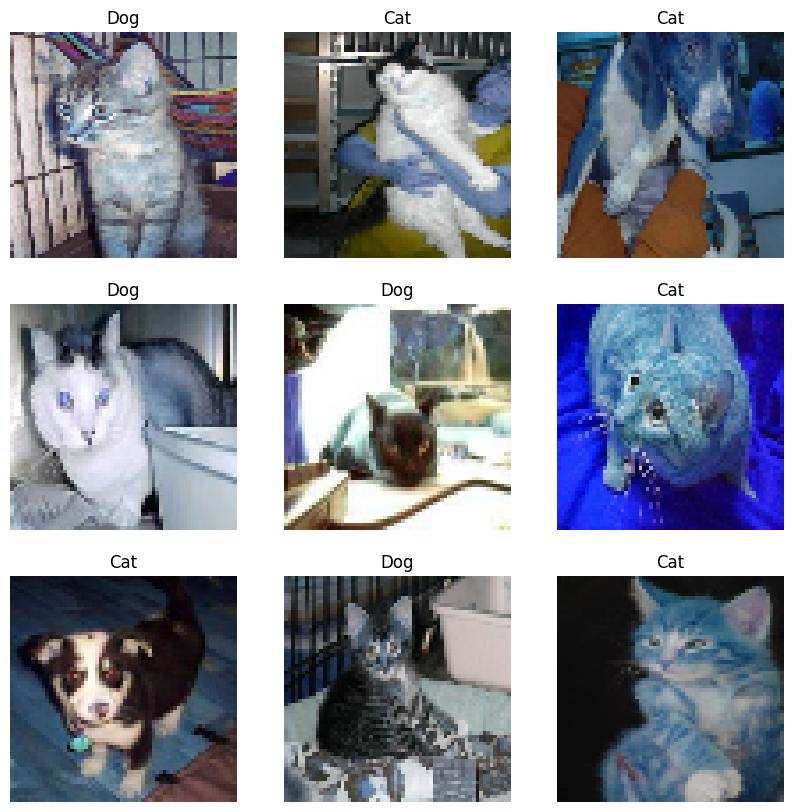

In [7]:
import matplotlib.pyplot as plt
import random

# pick 9 random images from validation set
indices = random.sample(range(len(X_val)), 9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    img = X_val[idx].reshape(64, 64, 3).astype('uint8')
    label = 'Dog' if y_pred[idx] == 1 else 'Cat'
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.show()


In [8]:
import joblib

# save the model
joblib.dump(model, 'svm_cat_dog_model.pkl')
print("Model saved as svm_cat_dog_model.pkl")



Model saved as svm_cat_dog_model.pkl


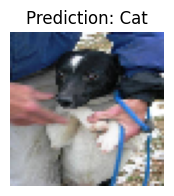

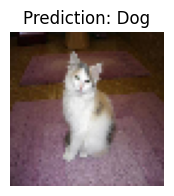

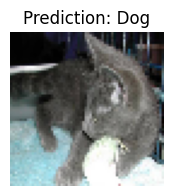

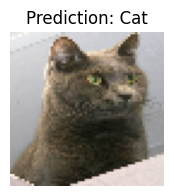

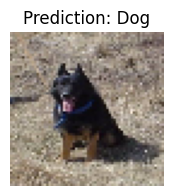

In [9]:

test_dir = "test1"
test_images = os.listdir(test_dir)

for img_file in test_images[:5]:  # test first 5
    img_path = os.path.join(test_dir, img_file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (64, 64))
        img_flat = img.flatten().reshape(1, -1)
        pred = model.predict(img_flat)
        label = 'Dog' if pred[0] == 1 else 'Cat'
        plt.figure(figsize=(2, 2))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Prediction: {label}")
        plt.axis('off')
        plt.show()


In [10]:
test_dir = "test1"
image_size = 64

In [11]:
test_images = random.sample(os.listdir(test_dir), 9)  # show 9 random

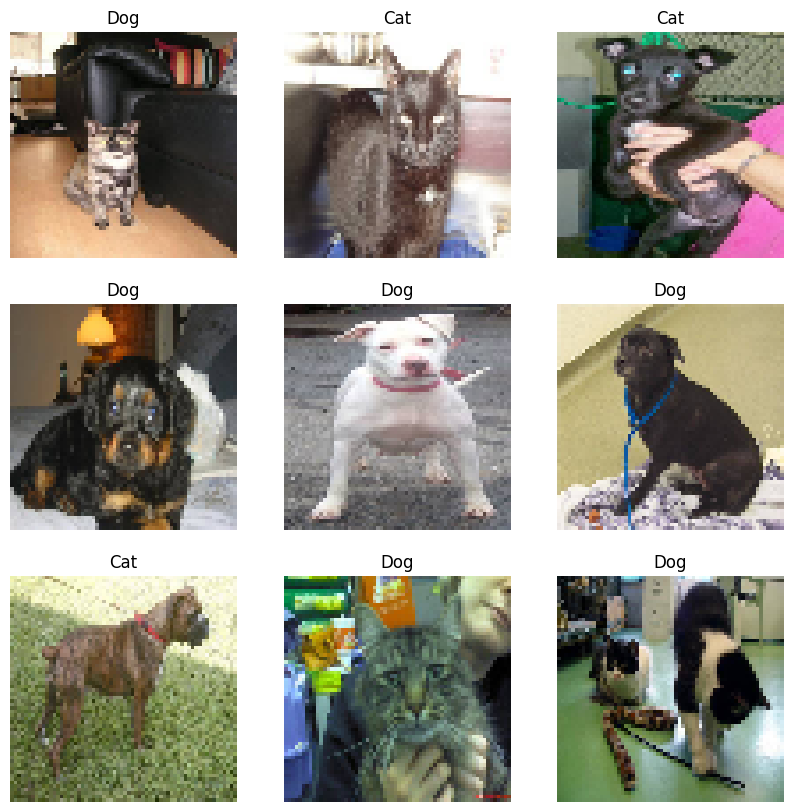

In [12]:
plt.figure(figsize=(10, 10))
for i, img_file in enumerate(test_images):
    img_path = os.path.join(test_dir, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (image_size, image_size))
    img_flat = img.flatten().reshape(1, -1)
    pred = model.predict(img_flat)
    label = 'Dog' if pred[0] == 1 else 'Cat'
    
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
plt.show()

🔹 Loading training images...
✅ Loaded: (100, 12288) images

🤖 Training SVM model...
✅ Model training complete!

🎯 Accuracy on unseen validation images: 60.00%

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.50      0.88      0.64         8

    accuracy                           0.60        20
   macro avg       0.67      0.65      0.60        20
weighted avg       0.70      0.60      0.59        20


💾 Model saved as 'svm_cat_dog_model.pkl'


C:\Users\SIRIVALLI REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


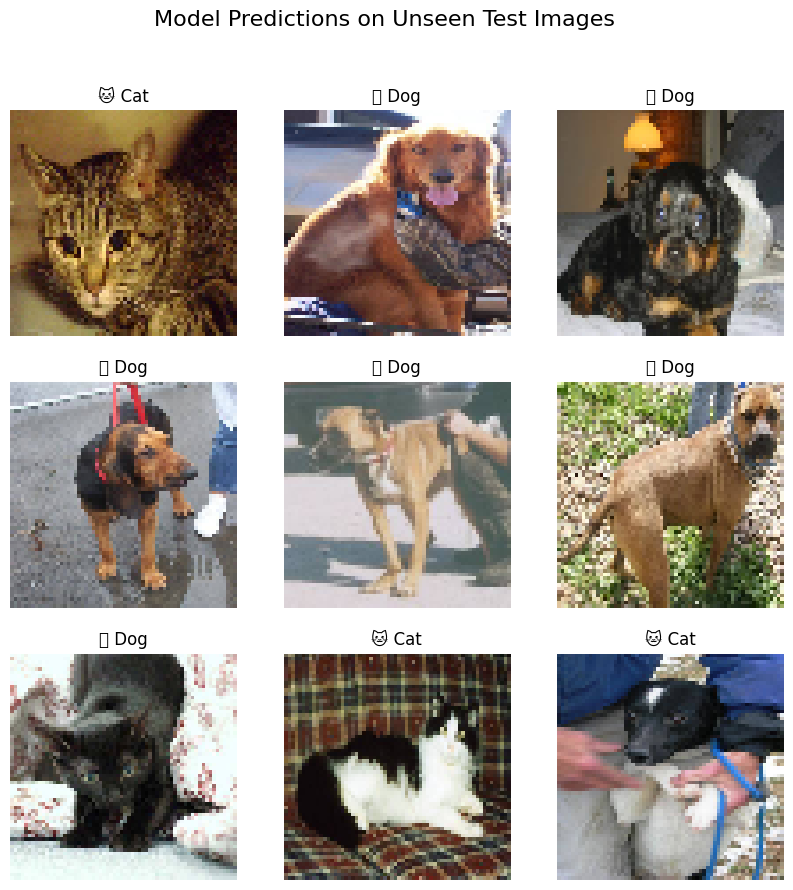

In [13]:

import joblib
import random

# ===== Step 1: Load and preprocess data =====
data = []
labels = []
image_size = 64
train_dir = "train"   # path to your train folder

print("🔹 Loading training images...")
for img_file in os.listdir(train_dir)[:100]:  # use first 1000 for speed
    img_path = os.path.join(train_dir, img_file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (image_size, image_size))
        data.append(img.flatten())
        if 'cat' in img_file.lower():
            labels.append(0)
        elif 'dog' in img_file.lower():
            labels.append(1)

data = np.array(data)
labels = np.array(labels)
print("✅ Loaded:", data.shape, "images")

# ===== Step 2: Split into training & validation =====
X_train, X_val, y_train, y_val = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# ===== Step 3: Train SVM model =====
print("\n🤖 Training SVM model...")
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)
print("✅ Model training complete!")

# ===== Step 4: Evaluate on unseen (validation) images =====
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"\n🎯 Accuracy on unseen validation images: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))

# ===== Step 5: Save the trained model =====
joblib.dump(model, 'svm_cat_dog_model.pkl')
print("\n💾 Model saved as 'svm_cat_dog_model.pkl'")

# ===== Step 6: Test on unlabeled test1 images =====
test_dir = "test1"
test_images = random.sample(os.listdir(test_dir), 9)

plt.figure(figsize=(10, 10))
for i, img_file in enumerate(test_images):
    img_path = os.path.join(test_dir, img_file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (image_size, image_size))
        img_flat = img.flatten().reshape(1, -1)
        pred = model.predict(img_flat)
        label = '🐶 Dog' if pred[0] == 1 else '🐱 Cat'

        plt.subplot(3, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')

plt.suptitle("Model Predictions on Unseen Test Images", fontsize=16)
plt.show()
